
## Exercise 4: SVM, Logistic Regression, and ROC Analysis

### Project Description

In this project, you will work with the `titanic.csv` dataset to predict which passengers survived the Titanic disaster. The project will involve data exploration, preprocessing, model development using SVM and Logistic Regression, and performance evaluation using ROC curves.

### Phase 1: Data Exploration

Understanding the data is crucial for building effective models. This phase focuses on exploring the dataset and visualizing important features.

1. **Part 1: Feature Analysis**:
   - **Boxplot, Histogram, and Barplot**:
     - Use the Titanic metadata to understand what each feature represents.
     - For each feature, choose one or two visualization techniques (e.g., boxplot, histogram, or barplot) to explore the distribution and relationship with the target variable (survival).
   - **Scatter Plot**:
     - Draw scatter plots for each feature against the target variable to identify potential correlations.
   - **Violin Plot**:
     - Create a violin plot for the `age` feature and compare it with a normal distribution to understand its distribution and spread.

### Phase 2: Data Preprocessing

Prepare the data for modeling by addressing missing values, encoding categorical variables, and scaling features.

1. **Part 2: Handling Missing Data**:
   - Identify missing values in the dataset and decide on appropriate strategies (e.g., imputation, removal).

2. **Part 3: Encoding Categorical Variables**:
   - Convert categorical features (e.g., `Sex`, `Embarked`) into numerical values using techniques like one-hot encoding or label encoding.

3. **Part 4: Feature Scaling**:
   - Normalize or standardize the numerical features to ensure that they contribute equally to the model's decision-making process.

4. **Part 5: Data Splitting**:
   - Split the dataset into training and testing sets to evaluate the models' performance on unseen data.

### Phase 3: Model Development

Develop predictive models using SVM (with linear and RBF kernels) and Logistic Regression.

1. **Part 6: Linear SVM**:
   - Implement a linear SVM model to predict passenger survival.
   - Train the model on the training set and evaluate its performance on the test set.

2. **Part 7: RBF SVM**:
   - Implement an RBF SVM model with a Gaussian kernel.
   - Train the model on the training set and evaluate its performance on the test set.

3. **Part 8: Logistic Regression**:
   - Implement a Logistic Regression model to predict passenger survival.
   - Train the model on the training set and evaluate its performance on the test set.

### Phase 4: Model Evaluation

1. **Part 9: ROC Curve Analysis**:
   - Draw the ROC curves for the Linear SVM, RBF SVM, and Logistic Regression models.
   - Compare these ROC curves with that of a random guess to evaluate the models' discriminatory power.

2. **Part 10: Model Comparison**:
   - Identify the best model based on the ROC curves and Area Under the Curve (AUC) values.
   - Discuss which model performs the best and why.

3. **Part 11: Threshold Analysis**:
   - Determine the best decision threshold for the Logistic Regression model to maximize the model's predictive power.

### Phase 5: Conclusion

1. **Part 12: Final Model Selection**:
   - Based on the ROC analysis and threshold optimization, select the best model for predicting Titanic survival.

2. **Part 13: Insights and Interpretation**:
   - Provide insights into the model's performance, strengths, and limitations.
   - Discuss potential areas for improvement or further research.


#EDA

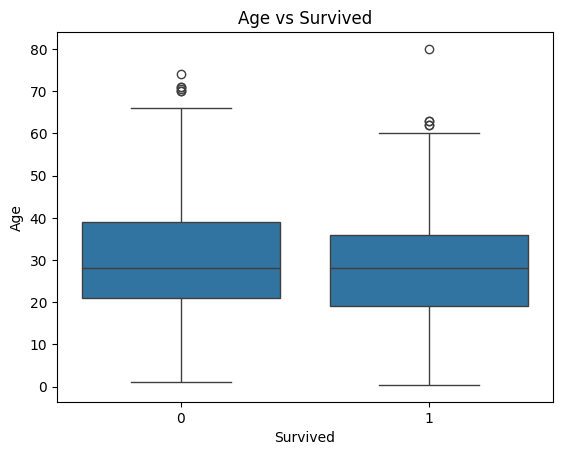

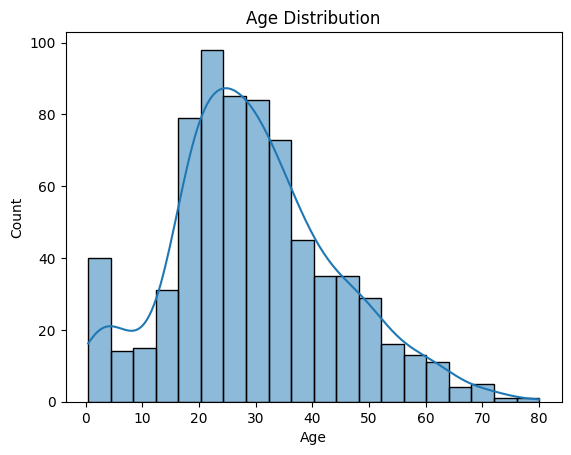

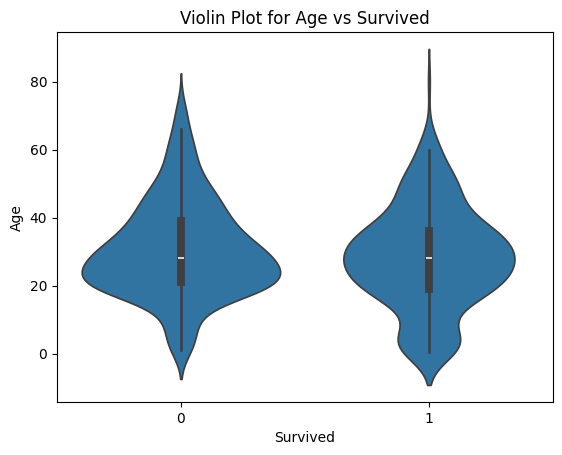

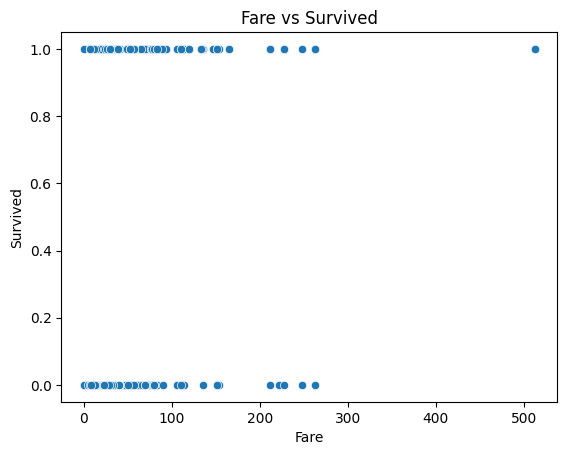

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

df = pd.read_csv('/content/titanic.csv')

# Phase 1: Data Exploration
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survived')
plt.show()

sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Violin Plot for Age vs Survived')
plt.show()

sns.scatterplot(x='Fare', y='Survived', data=df)
plt.title('Fare vs Survived')
plt.show()

#Data preprocessing

In [3]:
# Phase 2: Data Preprocessing

print(df.isnull().sum())
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y = df['Survived']

numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#Modelling

<Figure size 1000x800 with 0 Axes>

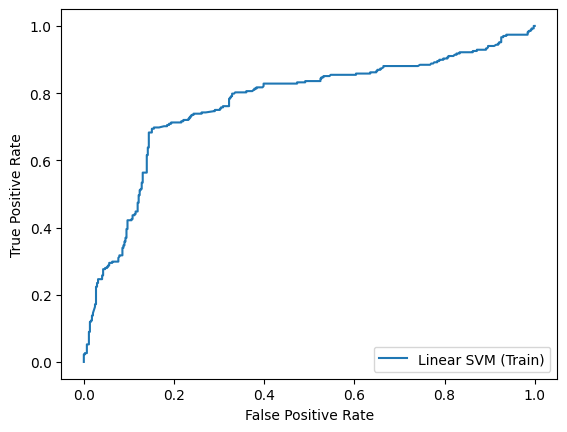

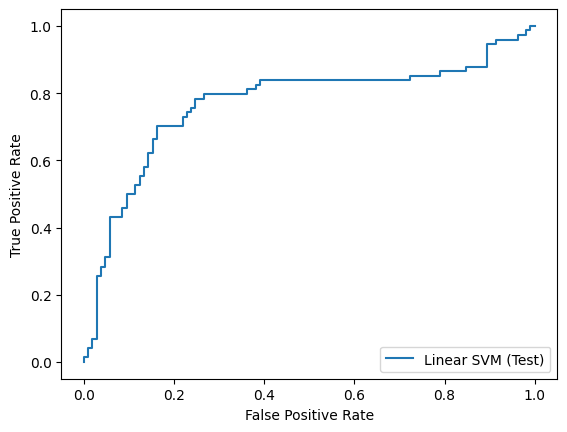

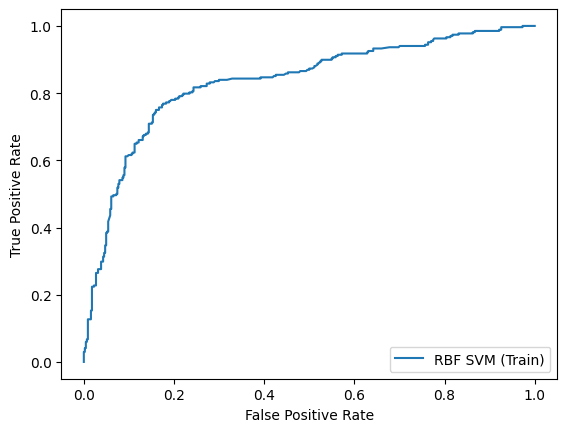

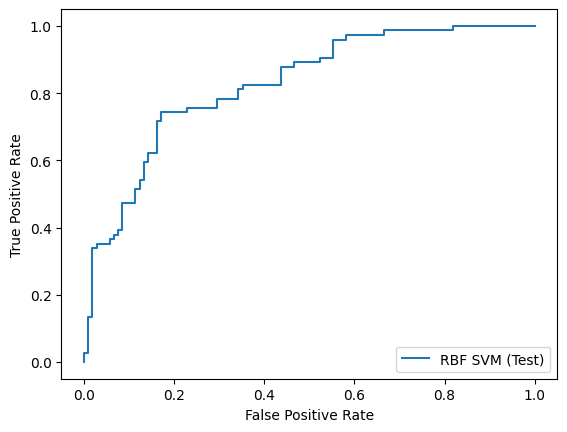

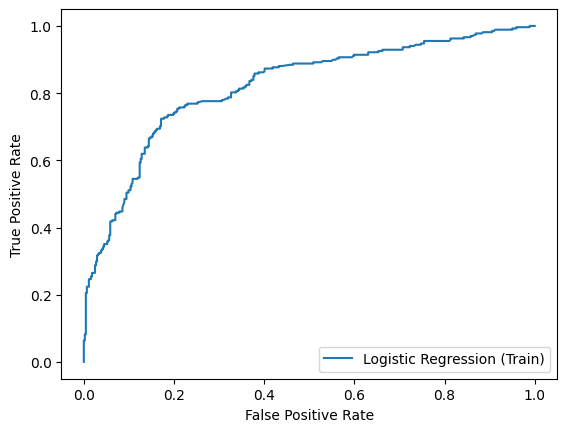

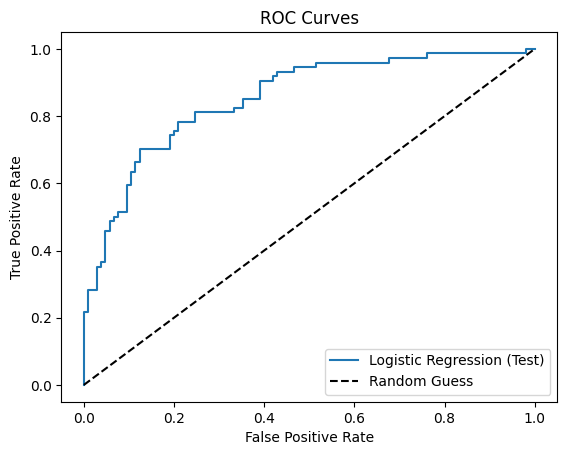

Linear SVM AUC (Train): 0.7705896194702164
Linear SVM AUC (Test): 0.7675675675675676
RBF SVM AUC (Train): 0.8333921608175339
RBF SVM AUC (Test): 0.8261261261261261
Logistic Regression AUC (Train): 0.8199710904934785
Logistic Regression AUC (Test): 0.8535392535392535
Optimal threshold for Logistic Regression: 0.6175926662938993

Conclusion:
The best model based on AUC is: Logistic Regression (Test)

Insights and Interpretation:
The ROC curves and AUC values show how well each model distinguishes between survivors and non-survivors.
The optimal threshold for Logistic Regression can help in making more informed predictions.
Consider further tuning, feature engineering, or exploring other models to improve performance.


In [4]:
# Phase 3: Model Development

pipeline_svm_linear = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', SVC(kernel='linear', probability=True))])

pipeline_svm_rbf = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', SVC(kernel='rbf', probability=True))])

pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(solver='liblinear'))])

param_grid_svm_linear = {'classifier__C': [0.1, 1, 10]}
param_grid_svm_rbf = {'classifier__C': [0.1, 1, 10], 'classifier__gamma': [0.01, 0.1, 1]}
param_grid_lr = {'classifier__C': [0.1, 1, 10]}

grid_search_svm_linear = GridSearchCV(pipeline_svm_linear, param_grid_svm_linear, cv=5)
grid_search_svm_rbf = GridSearchCV(pipeline_svm_rbf, param_grid_svm_rbf, cv=5)
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5)

grid_search_svm_linear.fit(X_train, y_train)
grid_search_svm_rbf.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)

# Phase 4: Model Evaluation

plt.figure(figsize=(10, 8))
for model, label in zip([grid_search_svm_linear, grid_search_svm_rbf, grid_search_lr],
                        ['Linear SVM', 'RBF SVM', 'Logistic Regression']):
    for dataset, name in zip([(X_train, y_train), (X_test, y_test)], ['Train', 'Test']):
        X_data, y_data = dataset
        y_proba = model.predict_proba(X_data)[:, 1]
        fpr, tpr, _ = roc_curve(y_data, y_proba)
        RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=f"{label} ({name})").plot()

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.legend()
plt.title('ROC Curves')
plt.show()

auc_scores = {}
for model, label in zip([grid_search_svm_linear, grid_search_svm_rbf, grid_search_lr],
                        ['Linear SVM', 'RBF SVM', 'Logistic Regression']):
    for dataset, name in zip([(X_train, y_train), (X_test, y_test)], ['Train', 'Test']):
        X_data, y_data = dataset
        auc = roc_auc_score(y_data, model.predict_proba(X_data)[:, 1])
        auc_scores[f'{label} ({name})'] = auc
        print(f'{label} AUC ({name}): {auc}')

# Threshold Analysis
y_scores_lr = grid_search_lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_lr)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal threshold for Logistic Regression: {optimal_threshold}')

# Phase 5: Conclusion
print("\nConclusion:")
best_model = max(auc_scores, key=auc_scores.get)
print(f"The best model based on AUC is: {best_model}")

print("\nInsights and Interpretation:")
print("The ROC curves and AUC values show how well each model distinguishes between survivors and non-survivors.")
print("The optimal threshold for Logistic Regression can help in making more informed predictions.")
print("Consider further tuning, feature engineering, or exploring other models to improve performance.")
